In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')

print("data loaded successfully")

data loaded successfully


In [2]:
# Load dataset in chunks for big data simulation
# file_path = '/mnt/data/Reviews.csv'  # Update with the correct path if needed

# Load dataset
df_main = pd.read_csv('Reviews.csv') # Read the csv file into a DataFrame

df = df_main # Create a copy of the DataFrame
chunk_size = 10000  # Process 10,000 rows at a time

print(df) # Print the DataFrame to check its contents
print("data loaded successfully")

            Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  HelpfulnessDenominato

In [3]:
# Initialize empty DataFrame for aggregated results
aggregated_data = pd.DataFrame()
print("loaded successfully")

loaded successfully


In [4]:
# Process dataset in chunks
for chunk in pd.read_csv('Reviews.csv', chunksize=chunk_size):
    # Ensure the column names are properly accessed
    if 'Text' in chunk.columns and 'HelpfulnessNumerator' in chunk.columns and 'HelpfulnessDenominator' in chunk.columns:
        chunk['HelpfulnessRatio'] = chunk['HelpfulnessNumerator'] / (chunk['HelpfulnessDenominator'] + 1e-5)
        chunk['TextLength'] = chunk['Text'].apply(lambda x: len(str(x)))
    else:
        print("One or more required columns are missing in the chunk. Skipping this chunk.")
        continue

    # Append chunk-wise processed data to aggregated_data
    aggregated_data = pd.concat([aggregated_data, chunk], ignore_index=True)

    print("loaded successfully")

loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully


In [5]:
# Display basic information about the aggregated dataset
print("Aggregated Dataset Info:")
print(aggregated_data.info())
print("\nFirst 5 Rows:\n", aggregated_data.head())

Aggregated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      568454 non-null  int64  
 1   ProductId               568454 non-null  object 
 2   UserId                  568454 non-null  object 
 3   ProfileName             568428 non-null  object 
 4   HelpfulnessNumerator    568454 non-null  int64  
 5   HelpfulnessDenominator  568454 non-null  int64  
 6   Score                   568454 non-null  int64  
 7   Time                    568454 non-null  int64  
 8   Summary                 568427 non-null  object 
 9   Text                    568454 non-null  object 
 10  HelpfulnessRatio        568454 non-null  float64
 11  TextLength              568454 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 52.0+ MB
None

First 5 Rows:
    Id   ProductId       

## **Task 1: Big Data Analysis**

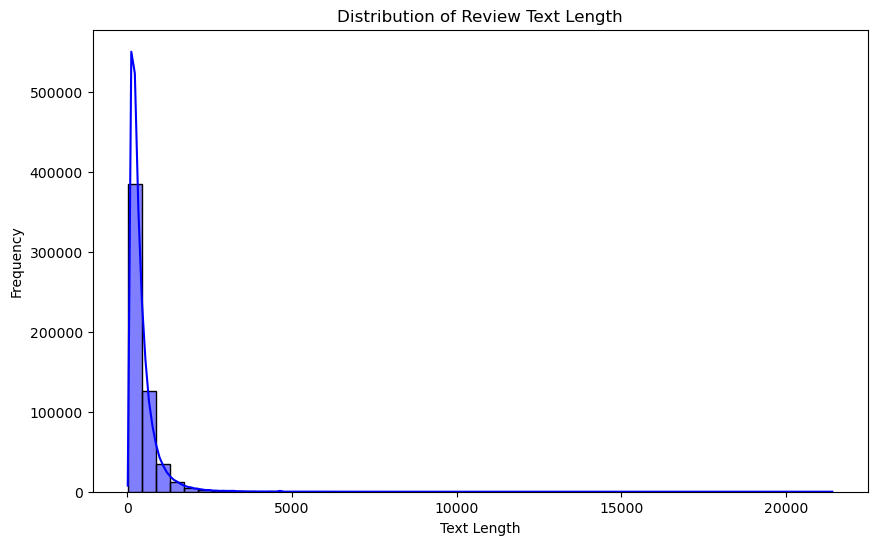

In [7]:
# Example analysis: Distribution of Text Length
plt.figure(figsize=(10, 6))
sns.histplot(aggregated_data['TextLength'], bins=50, kde=True, color='blue')
plt.title('Distribution of Review Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

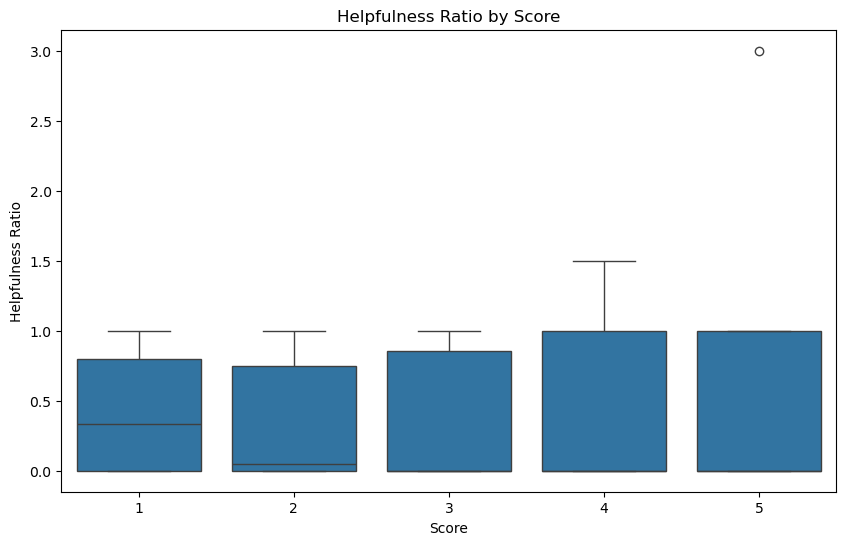

In [8]:
# Example analysis: Helpfulness Ratio Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='Score', y='HelpfulnessRatio', data=aggregated_data)
plt.title('Helpfulness Ratio by Score')
plt.xlabel('Score')
plt.ylabel('Helpfulness Ratio')
plt.show()

In [9]:
# Save processed data to a new CSV file for further use
processed_file_path = 'Processed_Reviews.csv'
aggregated_data.to_csv(processed_file_path, index=False)
print(f"Processed data saved to {processed_file_path}")

Processed data saved to Processed_Reviews.csv


## **Task 2: Predictive Analysis (Regression)**

In [11]:
# Assuming we predict 'Score' (a numerical value) based on 'HelpfulnessNumerator' and 'HelpfulnessDenominator'
print("\n--- Task 2: Predictive Analysis ---")


--- Task 2: Predictive Analysis ---


In [12]:
# Select relevant columns for prediction
predictive_df = aggregated_data[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score']].dropna()
X = predictive_df[['HelpfulnessNumerator', 'HelpfulnessDenominator']]
y = predictive_df['Score']
print("successful")

successful


In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("successful")

successful


In [14]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
print("successful")

successful


In [15]:
# Make predictions
y_pred = model.predict(X_test)
print("successful")

successful


In [16]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print("successful")

Mean Squared Error: 1.5448622811108321
R-squared: 0.0927285599830443
successful


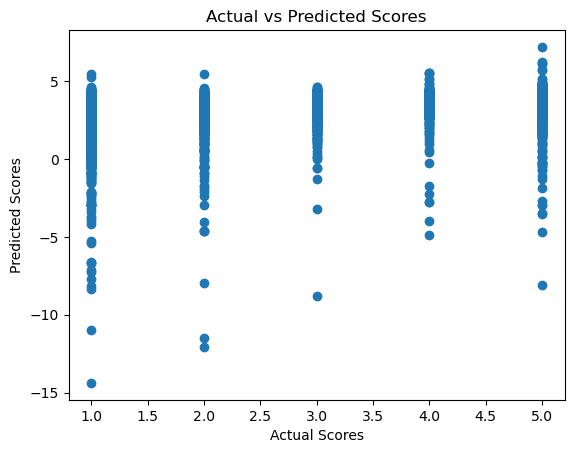

'load'

In [17]:
# Visualize actual vs predicted
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs Predicted Scores')
plt.show()
"load"

##  **Task 4: Sentiment Analysis**

In [19]:
# Consider 'Text' for reviews and 'Score' for sentiment (positive: Score >= 4, negative: Score <= 2)
sentiment_df = aggregated_data[['Text', 'Score']].dropna()
sentiment_df['Sentiment'] = sentiment_df['Score'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else 'neutral'))
sentiment_df = sentiment_df[sentiment_df['Sentiment'] != 'neutral']  # Remove neutral for binary classification
print("successful")

successful


In [20]:
# Prepare data for text vectorization
X_text = sentiment_df['Text']
y_sentiment = sentiment_df['Sentiment']
print("successful")

successful


In [21]:
# Convert text to numerical features using CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X_text_vectorized = vectorizer.fit_transform(X_text)
print("successful")

successful


In [22]:
# Split data into training and testing sets
X_train_text, X_test_text, y_train_sentiment, y_test_sentiment = train_test_split(X_text_vectorized, y_sentiment, test_size=0.2, random_state=42)
print("successful")

successful


In [23]:
# Train a Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_text, y_train_sentiment)
print("successful")

successful


In [24]:
# Make predictions
y_pred_sentiment = nb_model.predict(X_test_text)
print("successful")

successful


In [59]:
# Evaluate the model
print("Classification Report:\n", classification_report(y_test_sentiment, y_pred_sentiment))
print("successful")

Classification Report:
               precision    recall  f1-score   support

    negative       0.68      0.71      0.69     16379
    positive       0.95      0.94      0.94     88784

    accuracy                           0.90    105163
   macro avg       0.81      0.82      0.82    105163
weighted avg       0.90      0.90      0.90    105163

successful


In [61]:
# Save DataFrame to CSV file
aggregated_data.to_csv("Processed_Reviews_1.csv", index=False)

print("File saved successfully as Processed_Reviews_1.csv")

File saved successfully as Processed_Reviews_1.csv
